In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

In [88]:
import pandas as pd
from matplotlib import cm

## **Função de interesse, gradiente e matriz Hessiana**

$$f(x_1, x_2) = x_1^2 + \sin(x_1 + x_2) + x_2^4$$


$$\nabla f(x_1, x_2) = \left[
    \begin{array}{c}
    2 x_1 + \cos(x_1 + x_2) \\
    \cos(x_1 + x_2) + 4 x_2^3
    \end{array}
\right]$$


$$\nabla^{2} f(x_1, x_2) = \left[
    \begin{array}{cc}
    2 - \sin(x_1 + x_2) & - \sin(x_1 + x_2)            \\
    - \sin(x_1 + x_2)   & - \sin(x_1 + x_2) + 12 x_2^2
    \end{array}
\right]$$

A função é contínua e convexa no intervalo $$-\pi, 0$$, uma vez que é uma composição de funções monótonas e convexas nesse intervalo. Sendo assim, pelo teorema das funções convexas, tem-se que qualquer ponto minimizador dessa função é um minimizador global. Além disso, também pode-se dizer que qualquer ponto estacionário da função é um ponto minimizador.

# Gráficos

In [73]:
n_amostras = 40
x = np.linspace(-5, 5, n_amostras)
y = np.linspace(-5, 5, n_amostras)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

## - Gráficos das funções que compõe a função principal

In [72]:
def f1(x,y):
    return x**2

def f2(x,y):
    return np.sin(x+y)

def f3(x,y):
    return y**4

In [75]:
# funções simples
f1_plot = f1(X, Y)
f2_plot = f2(X, Y)
f3_plot = f3(X, Y)

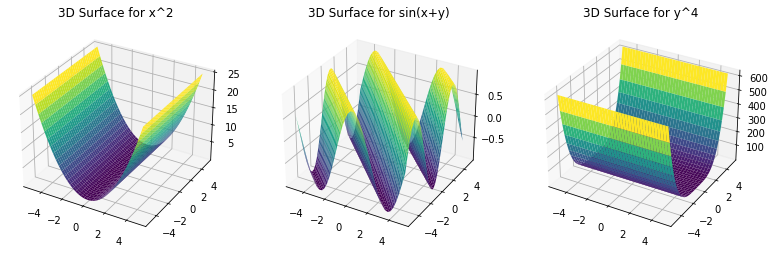

In [77]:
fig_f_blocks = plt.figure(figsize=plt.figaspect(0.3))

#-------------------------------------------------

ax_f1 = fig_f_blocks.add_subplot(1, 3, 1, projection='3d')

surf1 = ax_f1.plot_surface(X, Y, f1_plot, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax_f1.set_title('3D Surface for x^2')
#-------------------------------------------------

ax_f2 = fig_f_blocks.add_subplot(1, 3, 2, projection='3d')

surf2 = ax_f2.plot_surface(X, Y, f2_plot, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax_f2.set_title('3D Surface for sin(x+y)')

#-------------------------------------------------

ax_f3 = fig_f_blocks.add_subplot(1, 3, 3, projection='3d')
surf3 = ax_f3.plot_surface(X, Y, f3_plot, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax_f3.set_title('3D Surface for y^4')

#-------------------------------------------------

plt.show()

Como é possível observar, as funções f1 e f3 são convexas em todo o espaço do $$ \mathbb{R}_{2} $$.

## - Gráficos das combinações duplas das funções que compõe a função principal

In [74]:
def f1_f3(x,y):
    return (x**2)+(y**4)

def f1_f2(x,y):
    return (x**2)+np.sin(x+y)

def f3_f2(x,y):
    return (y**4)+np.sin(x+y)

In [76]:
# funções compostas
f1_f3_plot = f1_f3(X, Y)
f1_f2_plot = f1_f2(X, Y)
f3_f2_plot = f3_f2(X, Y)

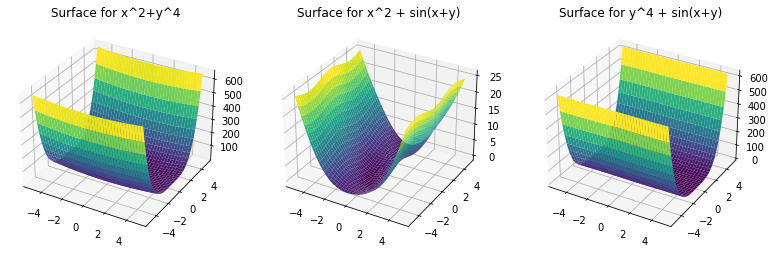

In [78]:
fig_f_mixed = plt.figure(figsize=plt.figaspect(0.3))

#-------------------------------------------------

ax_f1_f3 = fig_f_mixed.add_subplot(1, 3, 1, projection='3d')

ax_f1_f3.plot_surface(X, Y, f1_f3_plot, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax_f1_f3.set_title('Surface for x^2+y^4')

#-------------------------------------------------

ax_f1_f2 = fig_f_mixed.add_subplot(1, 3, 2, projection='3d')

ax_f1_f2.plot_surface(X, Y, f1_f2_plot, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax_f1_f2.set_title('Surface for x^2 + sin(x+y)')

#-------------------------------------------------

ax_f3_f2 = fig_f_mixed.add_subplot(1, 3, 3, projection='3d')

ax_f3_f2.plot_surface(X, Y, f3_f2_plot, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax_f3_f2.set_title('Surface for y^4 + sin(x+y)')

#-------------------------------------------------

plt.show()

# Definição da Função principal, gradiente e hessiana

In [3]:
def f(x: np.float64, y: np.float64) -> np.float64:
    return x**2 + np.sin(x+y) + y**4

def grad(x: np.float64, y: np.float64) -> np.ndarray:
    return np.array(
        [2*x + np.cos(x+y), np.cos(x+y) + 4*y**3],
        dtype=np.float64
    )

def hessian(x: np.float64, y: np.float64) -> np.ndarray:
    return np.array(
        [
            [2 - np.sin(x+y), -np.sin(x+y)],
            [-np.sin(x+y)   , -np.sin(x+y) + 12*y**2 ],
        ],
        dtype=np.float64
    )

**Abaixo, definem-se derivadas de primeira ordem em x e y para a construção numérica de uma matriz Hessiana aproximada para a função**

In [4]:
def dx(f, x:np.float64, y:np.float64, h: np.float64 = np.float64(1e-6)) -> np.ndarray:
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def dy(f, x:np.float64, y:np.float64, h: np.float64 = np.float64(1e-6)) -> np.ndarray:
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

def hessian_apx(f, x:np.float64, y:np.float64, hx: np.float64 = np.float64(1e-6), hy: np.float64 = np.float64(1e-6)) -> np.ndarray:
    df_x = lambda x, y: dx(f, x, y, hx)
    df_y = lambda x, y: dy(f, x, y, hy)
    
    return np.array(
        [
            [dx(df_x, x, y, hx), dy(df_x, x, y, hy)],
            [dx(df_y, x, y, hx), dy(df_y, x, y, hy)],
        ],
        dtype=np.float64
    )

**Construção de uma representação em 3D do gráfico da função de interesse**

In [86]:
x_f = np.linspace(-(np.pi/2), 0, n_amostras)
y_f = np.linspace(-(np.pi/2), 0, n_amostras)

X_f, Y_f = np.meshgrid(x_f, y_f)
Z_f = f(X_f, Y_f)

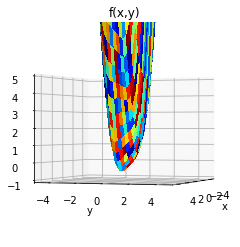

In [89]:
fig_f_domain = plt.figure(figsize=plt.figaspect(0.6))

ax_f_v1 = fig_f_domain.add_subplot(1, 1, 1, projection='3d')

my_col = cm.jet(np.random.rand(Z.shape[0],Z.shape[1]))

surf1 = ax_f_v1.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors = my_col, linewidth=0, antialiased=False)

ax_f_v1.set_xlabel('x')
ax_f_v1.set_ylabel('y')
ax_f_v1.set_zlabel('z')
ax_f_v1.set_title('f(x,y)')
ax_f_v1.set_xlim3d([-5, 5])
ax_f_v1.set_ylim3d([-5, 5])
ax_f_v1.set_zlim3d([-1, 5])

ax_f_v1.view_init(0, 20)
plt.show()

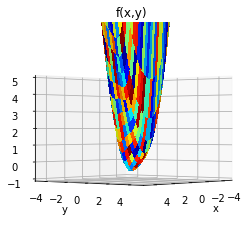

In [90]:
ax_f_v1.view_init(0, 40)
fig_f_domain

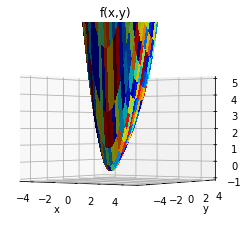

In [91]:
ax_f_v1.view_init(0, -55)
fig_f_domain

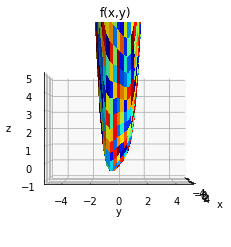

In [92]:
ax_f_v1.view_init(0, 0)
fig_f_domain

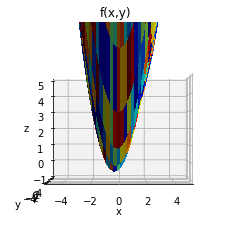

In [93]:
ax_f_v1.view_init(0, -90)
fig_f_domain

**Abaixo definem-se a busca de Armijo e uma função para cálculo de inversas de matrizes quadradas**

In [7]:
def armijo(f, grad, x0: np.array, d, gama, n, t=1):
    
    # gama e n pertencem ao intervalo (0, 1)
    assert gama < 1
    assert gama > 0
    assert n < 1
    assert n > 0

    iter = 0

#    x0 = np.array(x0, dtype='double')
    x = x0[0]
    y = x0[1]

    while f(x+t*d[0], y+t*d[1]) > (f(x, y) + n*t*np.dot((grad(x, y)).T, d)):
        if iter == 200:
            print('Limite de iteracoes atingido')
            return([x + t*d[0],y + t*d[1]], iter)
        t = gama*t
        iter += 1
    return([x + t*d[0],y + t*d[1]], iter)

In [8]:
# Primeiro invertemos a matriz Hessiana, a fim de utilizar a inversa no algoritmo

def invert_quad_matrix(hessian, x0):
#    x0 = np.array(x0, dtype='double')
    x = x0[0]
    y = x0[1]
    mat = hessian(x, y)

    det = (mat[0][0] * mat[1][1]) - (mat[0][1] * mat[1][0])

    if det == 0:
        raise ValueError('Matriz é singular e não pode ser invertida.')
    else:
        inv_mat = 1.0 / det * np.array(([mat[1][1],-mat[0][1]],[-mat[1][0],mat[0][0]]),dtype='double')
    return inv_mat

**Definição de função para o algoritmo do Método do Gradiente**

In [9]:
def grad_method(funcao, grad, x0, y0, gama, n, err, t=1):
    k = 0
    iter_armijo = 0
    
    erro = 0

    x = x0
    y = y0
    
    while not (np.allclose(grad(x,y), [0.0,0.0], atol=err, rtol=0)):
    
        d = (-grad(x, y))
        [x,y], i_armijo = armijo(funcao, grad, [x,y], d, gama, n, t)
        iter_armijo += i_armijo
        k += 1
        erro = np.abs(grad(x, y)-[0.0,0.0])
    
    return([x,y], k, iter_armijo, erro)

In [10]:

otimo_grad, k, armijos, erro_grad = grad_method(f, grad, -(np.pi/9),-(np.pi/7), gama=0.7, n=0.5, err=1e-5)

In [14]:
a = grad_method(f, grad, 1,-1, gama=0.7, n=0.5, err=1e-5)
a

([-0.32321059044087136, -0.5446934633516013],
 10,
 36,
 array([5.94116427e-06, 4.59620786e-06]))

In [15]:
print(f'Para t inicializado em 1:\n[x, y] otimo:\n{otimo_grad}\nIteracoes: {k}\nChamadas de Armijo: {armijos}\nValor de f: {f(otimo_grad[0], otimo_grad[1])}')


Para t inicializado em 1:
[x, y] otimo:
[-0.3232140318188748, -0.5446942005698302]
Iteracoes: 8
Chamadas de Armijo: 28
Valor de f: -0.5704851205489828


In [41]:
pontos_iniciais = [[-(np.pi/5),-(np.pi/3)],[-(np.pi/4),-(np.pi/2)], [-(np.pi/7),-(np.pi/8)], [-(np.pi/6),-(np.pi/5)], [-(np.pi/9),-(np.pi/7)]]

In [17]:
f(pontos_iniciais[0][0], pontos_iniciais[0][1])

0.6028436514654538

In [45]:
len(otimo_gradient)

5

In [81]:
iteracoes_gradient=[]
armijo_gradient=[]
otimo_gradient=[]
valor_otimo_gradient=[]
err_gradient=[]

In [82]:
for p in pontos_iniciais:
    otimo_grad, k, armijos, erro_grad = grad_method(f, grad, p[0], p[1], gama=0.7, n=0.5, err=1e-5)
    print(otimo_grad, k, armijos, erro_grad)
    otimo_gradient.append(otimo_grad)
    iteracoes_gradient.append(k)
    armijo_gradient.append(armijos)
    err_gradient.append(round(f(erro_grad[0], erro_grad[1]),10))

[-0.3232140832212329, -0.5446938702593247] 10 40 [4.01976876e-06 1.72124313e-07]
[-0.3232138999283077, -0.544693474454658] 11 47 [3.21134415e-06 2.02314420e-06]
[-0.32321377159739817, -0.5446918132723426] 8 27 [1.58932435e-06 9.30277787e-06]
[-0.32321424233276264, -0.5446938261589822] 9 33 [4.42574286e-06 2.41383575e-07]
[-0.3232140318188748, -0.5446942005698302] 8 28 [4.12976493e-06 1.21668076e-06]


In [83]:
for opt in otimo_gradient:
    print(opt[0], opt[1])
    valor_otimo_gradient.append(f(opt[0], opt[1]))

-0.3232140832212329 -0.5446938702593247
-0.3232138999283077 -0.544693474454658
-0.32321377159739817 -0.5446918132723426
-0.32321424233276264 -0.5446938261589822
-0.3232140318188748 -0.5446942005698302


In [84]:
data_gradient_method = {'Ponto inicial':pontos_iniciais,
                         '# de Iterações':iteracoes_gradient,
                         '# de Cham. Armijo':armijo_gradient,
                         '"Ponto Ótimo"':otimo_gradient,
                         'Valor Ótimo':valor_otimo_gradient,
                         'Erro de aproximação':err_gradient
                        }

In [85]:
df_gradient = pd.DataFrame(data_gradient_method)
df_gradient

,Ponto inicial,# de Iterações,# de Cham. Armijo,"""Ponto Ótimo""",Valor Ótimo,Erro de aproximação
0,"[-0.6283185307179586, -1.0471975511965976]",10,40,"[-0.3232140832212329, -0.5446938702593247]",-0.570485,0.000004
1,"[-0.7853981633974483, -1.5707963267948966]",11,47,"[-0.3232138999283077, -0.544693474454658]",-0.570485,0.000005
2,"[-0.4487989505128276, -0.39269908169872414]",8,27,"[-0.32321377159739817, -0.5446918132723426]",-0.570485,0.000011
3,"[-0.5235987755982988, -0.6283185307179586]",9,33,"[-0.32321424233276264, -0.5446938261589822]",-0.570485,0.000005
4,"[-0.3490658503988659, -0.4487989505128276]",8,28,"[-0.3232140318188748, -0.5446942005698302]",-0.570485,0.000005


**Definição de função para o algoritmo do Método de Newton**

In [59]:
def newton_method(funcao, grad, x0, gama, n, err, use_armijo):
    x = x0[0]
    y = x0[1]

    k = 0
    iter_armijo = 0
    erro = 0

    while not (np.allclose(grad(x, y),[0.0,0.0], atol=err, rtol=0)):
            erro = np.abs(grad(x, y)-[0.0,0.0])
            tmp = [x, y]
            inversa = invert_quad_matrix(hessian, [x, y])
            d = -1*np.dot(inversa, grad(x, y))
            
            if use_armijo:
                [x, y], i_armijo = armijo(funcao, grad, [x, y], d, gama, n, use_armijo)
                iter_armijo += i_armijo
            else:
                [x, y] = [x + 1*d[0], y + 1*d[1]]
            
            if (np.allclose([x, y], tmp, rtol=0, atol=err) and k > 100):
                print('Condicao de parada atingida - ponto x de minimo nao modificado em uma iteracao')
                return([x, y], k, iter_armijo, erro) 
            k += 1
            
            if k > 1000:
                print('Condicao de parada - numero max de iteracoes (k = 1000) superado')
                return([x, y], k, iter_armijo, erro)
                
    print('Metodo convergiu a menos da tolerancia -> ', err)
    return([x, y], k, iter_armijo, erro)

In [60]:
otimo_newton, k_newton, armijos_newton, erro_newton = newton_method(f, grad, [-(np.pi/9),-(np.pi/7)], gama=0.8, n=0.25, err=1e-5, use_armijo=True)
print(f'Para t inicializado em 1:\nPonto otimo: {otimo_newton}\nIteracoes: {k_newton}\nChamadas de Armijo: {armijos_newton}\nResultado de f: {f(otimo_newton[0], otimo_newton[1])}')

Metodo convergiu a menos da tolerancia ->  1e-05
Para t inicializado em 1:
Ponto otimo: [-0.32321243514164855, -0.5446946398508882]
Iteracoes: 3
Chamadas de Armijo: 0
Resultado de f: -0.5704851205516385


**Definição de funções para o algoritmo do Método Quase-Newton**

* BFGS

###### A matriz Hessiana inicial do modelo de otimização da função de interesse será a matriz identidade - $H_0 = I$ - pois esta precisa ser definida positiva. O desafio é atualizar $H$ de modo que $H_{k+1}$ também seja apropriada. O método de atualização BFGS é o mais utilizado por seu desempenho computacional.

In [64]:
pontos_iniciais = [[-(np.pi/5),-(np.pi/3)],[-(np.pi/4),-(np.pi/2)], [-(np.pi/7),-(np.pi/8)], [-(np.pi/6),-(np.pi/5)], [-(np.pi/9),-(np.pi/7)]]

In [55]:
f(pontos_iniciais[0][0], pontos_iniciais[0][1])

0.6028436514654538

In [66]:
iteracoes_newton=[]
armijo_newton=[]
otimo_newton=[]
valor_otimo_newton=[]
err_newton=[]

In [67]:
for p in pontos_iniciais:
    otm_newton, k_newton, armijos_newton, erro_newton = newton_method(f, grad, [p[0],p[1]], gama=0.8, n=0.25, err=1e-5, use_armijo=True)
    print(otm_newton, k_newton, armijos, erro_newton)
    
    otimo_newton.append(otm_newton)
    iteracoes_newton.append(k_newton)
    armijo_newton.append(armijos)
    err_newton.append(round(f(erro_newton[0], erro_newton[1]),10))

Metodo convergiu a menos da tolerancia ->  1e-05
[-0.3232125421969799, -0.5446941822988848] 5 28 [1.49719961e-06 5.39978311e-05]
Metodo convergiu a menos da tolerancia ->  1e-05
[-0.3232125421887686, -0.5446941823339826] 6 28 [1.58774466e-06 5.73345184e-05]
Metodo convergiu a menos da tolerancia ->  1e-05
[-0.323212542040969, -0.5446941829657017] 4 28 [2.74454176e-06 9.98681857e-05]
Metodo convergiu a menos da tolerancia ->  1e-05
[-0.3232125223262554, -0.5446942700744134] 3 28 [6.97201788e-05 9.76056762e-04]
Metodo convergiu a menos da tolerancia ->  1e-05
[-0.32321243514164855, -0.5446946398508882] 3 28 [6.07291363e-05 2.20435476e-03]


In [69]:
for opt in otimo_newton:
    print(opt[0], opt[1])
    valor_otimo_newton.append(f(opt[0], opt[1]))

-0.3232125421969799 -0.5446941822988848
-0.3232125421887686 -0.5446941823339826
-0.323212542040969 -0.5446941829657017
-0.3232125223262554 -0.5446942700744134
-0.32321243514164855 -0.5446946398508882


In [70]:
data_newton_method = {'Ponto inicial':pontos_iniciais,
                         '# de Iterações':iteracoes_newton,
                         '# de Cham. Armijo':armijo_newton,
                         '"Ponto Ótimo"':otimo_newton,
                         'Valor Ótimo':valor_otimo_newton,
                         'Erro de aproximação':err_newton
                        }

In [71]:
df_newton = pd.DataFrame(data_newton_method)
df_newton

,Ponto inicial,# de Iterações,# de Cham. Armijo,"""Ponto Ótimo""",Valor Ótimo,Erro de aproximação
0,"[-0.6283185307179586, -1.0471975511965976]",5,28,"[-0.3232125421969799, -0.5446941822988848]",-0.570485,0.000055
1,"[-0.7853981633974483, -1.5707963267948966]",6,28,"[-0.3232125421887686, -0.5446941823339826]",-0.570485,0.000059
2,"[-0.4487989505128276, -0.39269908169872414]",4,28,"[-0.323212542040969, -0.5446941829657017]",-0.570485,0.000103
3,"[-0.5235987755982988, -0.6283185307179586]",3,28,"[-0.3232125223262554, -0.5446942700744134]",-0.570485,0.001046
4,"[-0.3490658503988659, -0.4487989505128276]",3,28,"[-0.32321243514164855, -0.5446946398508882]",-0.570485,0.002265


###### **Funções para atualização de B e H**

In [432]:

def almost_newton_method(f, grad, x0, gama, n, err, h0=np.eye(2),t=10):
    x = x0[0]
    y = x0[1]
    
    armijo_calls = 0
    k = 0
    
    h = h0
    erro = 0

    while not (np.allclose(grad(x,y),[0.0,0.0],atol=err,rtol=0)):
        tmp_xk = np.array([x, y])
        tmp_grad = grad(x, y)
        d = np.dot(-h, tmp_grad)
        
        [x,y], i_armijo = armijo(f, grad, [x,y], d, gama, n, t)
        
        k += 1
        
        armijo_calls += i_armijo
        
        p = np.array([x, y]) - tmp_xk
        q = grad(x, y) - tmp_grad
        
        bfgs1 = (1 + np.dot(np.dot(q.T, h), q) / np.dot(p.T, q))
        bfgs2 = np.dot(p, p.T) / np.dot(p.T, q)

        bfgs = h + np.dot(bfgs1,bfgs2) - (np.dot(np.dot(p, q.T), h) + np.dot(np.dot(h, q), p.T)) / np.dot(p.T, q)
        h = bfgs
    
        erro = np.abs(grad(x, y)-[0.0,0.0])

        if k > 1000:
                print('Condicao de parada - numero max de iteracoes (k = 1000) superado')
                return([x, y], k, armijo_calls, erro)
    return [x,y], k, armijo_calls, erro

In [433]:
otimo_anewton, k_anewton, arm_anewton, erro_anewton = almost_newton_method(f,grad,[-(np.pi/9),-(np.pi/7)],0.8,0.7,1e-5)
print(f'Para t inicializado em 1:\notimo:\n{otimo_anewton}\nIteracoes: {k_anewton}\nChamadas de Armijo: {arm_anewton}\nResultado de f: {f(otimo_anewton[0], otimo_anewton[1])}')

Condicao de parada - numero max de iteracoes (k = 1000) superado
Para t inicializado em 1:
otimo:
[nan, nan]
Iteracoes: 1001
Chamadas de Armijo: 4218
Resultado de f: nan


C:\Users\rayss\AppData\Local\Temp\ipykernel_17936\3555553539.py:25: RuntimeWarning: invalid value encountered in scalar divide
  bfgs1 = (1 + np.dot(np.dot(q.T, h), q) / np.dot(p.T, q))
C:\Users\rayss\AppData\Local\Temp\ipykernel_17936\3555553539.py:26: RuntimeWarning: invalid value encountered in scalar divide
  bfgs2 = np.dot(p, p.T) / np.dot(p.T, q)
C:\Users\rayss\AppData\Local\Temp\ipykernel_17936\3555553539.py:28: RuntimeWarning: invalid value encountered in divide
  bfgs = h + np.dot(bfgs1,bfgs2) - (np.dot(np.dot(p, q.T), h) + np.dot(np.dot(h, q), p.T)) / np.dot(p.T, q)


In [434]:
# def BFGS_B(B, s: np.array, x0: np.array): 
#     B = B - (B * s) * (B * s).T / np.dot(s, B * s) + x0 * x0.T / np.dot(x0, s)
#     return B

# def BFGS_H(H, s: np.array, x0: np.array):
#     rho = 1 / np.dot(s, x0)
#     H = (I - rho * s * x0.T) * H * (I - rho * x0 * s.T) + rho * s * s.T
#     return H